In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib
import telecontrol_parser as tp
import timeseries_functions as tf
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import modelling as mdl
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.linear_model import *
from sklearn.neural_network import *
from sklearn.ensemble import *
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn import tree
import sklearn
from sklearn.experimental import enable_hist_gradient_boosting
import tkinter
import plotly
import statsmodels.api as sma
from importlib import reload

root = tkinter.Tk()
my_dpi = root.winfo_fpixels('1i')

In [2]:
MLdb = mdl.MLdata('../data_sets/feats/')
MLdb.load_datasets()
MLdb.load_lobith_feats()
MLdb.set_dataset(2,features=('lobith_feats','gemaal_feats'))
# MLdb.set_dataset(2,features=tuple())



In [3]:
print(len(MLdb.dataset.columns))

743


In [4]:

# MLdb.combine_datasets()
# print(MLdb.datadict[list(MLdb.datadict.keys())[2]])
# print(MLdb.datadict['ALL'])
# print(MLdb.get_datasets())
print(len(MLdb.dataset.columns))
MLdb.clean_columns()
print(len(MLdb.dataset.columns))
MLdb.drop_na()
print(len(MLdb.dataset.columns))
MLdb.create_train_test_split(0.8)

# MLdb.linear_regression()
MLdb.scale_data()
y_pred_naive = MLdb.naive_predictive()
# MLdb.dataset
MLdb.vif_threshold = 20

743
738
738


In [5]:
print(len(MLdb.train_x.columns))
# MLdb.get_VIF(keep=True)
# MLdb.calc_VIF(80)
# print(len(MLdb.VIF))
print(len(MLdb.train_x.columns))

522
522


In [6]:
# MLdb.calc_VIF(50)

In [7]:
len(list(MLdb.train_x.columns))

522

In [8]:
# MLdb.use_model(modelfunc = HistGradientBoostingRegressor)
# MLdb.use_model(modelfunc = OrthogonalMatchingPursuitCV)
MLdb.use_model(modelfunc = LinearRegression)
# MLdb.use_model()
# MLdb.use_model(modelfunc = LassoCV, n_jobs = 5)




0.9730845551508067


In [9]:
model = MLdb.model


In [10]:
X = MLdb.train_x
y = MLdb.train_y.iloc[:,6*36-1]
X2 = sma.add_constant(X)
est = sma.OLS(y,X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:        EGV_OPP_(t+216)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     1295.
Date:                Mon, 12 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:31:49   Log-Likelihood:            -3.5591e+05
No. Observations:              215182   AIC:                         7.126e+05
Df Residuals:                  214781   BIC:                         7.167e+05
Df Model:                         400                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [11]:
# coefs = pd.DataFrame(model.coef_,columns = MLdb.train_x.columns)
# coefs.columns[coefs.iloc[0,:]>0]

y_pred = model.predict(MLdb.test_x)
y_pred

array([[ 0.69587763,  0.67034431,  0.64271546, ..., -0.28382843,
        -0.29334478, -0.30975469],
       [ 0.70467003,  0.68158157,  0.65371547, ..., -0.28369883,
        -0.28569334, -0.31115698],
       [ 0.70668744,  0.68646127,  0.65260512, ..., -0.38850621,
        -0.40744512, -0.43395866],
       ...,
       [ 0.73807053,  0.74088527,  0.74174596, ...,  0.11372298,
         0.1138642 ,  0.13124259],
       [ 0.74286945,  0.74153208,  0.73462367, ...,  0.1414076 ,
         0.14434741,  0.16204239],
       [ 0.74271798,  0.7412308 ,  0.7369576 , ...,  0.08910686,
         0.08498817,  0.10992866]])

In [12]:
# y_pred = model.predict(MLdb.test_x)
horizon = 6*1
scale = 0.75
plot = plt.figure(figsize=(scale*1920/my_dpi, scale*1080/my_dpi))
plt.plot(MLdb.test_y.iloc[:,horizon-1],label = 'true')
plt.plot(MLdb.test_y.index,y_pred[:,horizon-1], label = 'prediction')
plt.legend(fontsize = 'xx-large',loc = 'lower right')
plt.title('Model op t + '+str(horizon))
# plt.ylim(0,20)

plotly.tools.mpl_to_plotly(plot)

c:\Users\Admin\Anaconda3\envs\py36_env\lib\site-packages\plotly\matplotlylib\renderer.py:612: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



In [13]:
# print(MLdb.test_y)
# print(y_pred)
test_y = MLdb.test_y.iloc[:,0].values
pred_y = y_pred[:,0]

# print(mse(MLdb.test_y,y_pred)**(1/2))

In [14]:
# MLdb.test_x

In [15]:
# y_pred_naive

<Figure size 432x288 with 0 Axes>

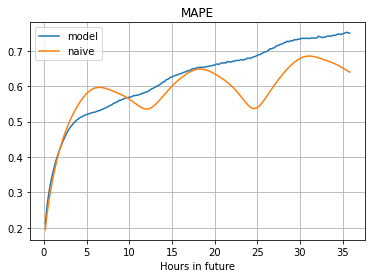

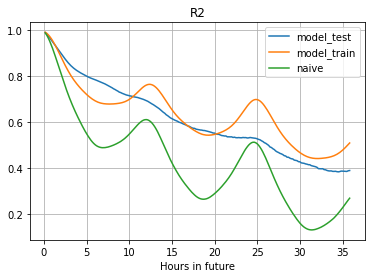

<Figure size 432x288 with 0 Axes>

In [16]:
mape_list = []
R2_list = []
R2_train_list = []
mape_list_naive = []
R2_list_naive = []

y_pred_train = model.predict(MLdb.train_x)


for i in range(0,MLdb.test_y.shape[1]-1):
    test_y = MLdb.test_y.iloc[:,i].values
    train_y = MLdb.train_y.iloc[:,i].values
    pred_y = y_pred[:,i]
    pred_y_train = y_pred_train[:,1]
    pred_y_naive = y_pred_naive.iloc[:,i]
    mape_list.append(mape(test_y,pred_y)**(1/2))
    R2_list.append(r2_score(test_y,pred_y))
    mape_list_naive.append(mape(test_y,pred_y_naive)**(1/2))
    R2_list_naive.append(r2_score(test_y,pred_y_naive))
    R2_train_list.append(r2_score(train_y,pred_y_train))

R2_list = np.array(R2_list).clip(min=0)


x_bereik = [(i*10+10)/60 for i in range(len(R2_list))]
plt.plot(x_bereik,mape_list,label = 'model')
plt.plot(x_bereik,mape_list_naive,label = 'naive')
plt.title('MAPE')
plt.xlabel('Hours in future')
plt.legend()
plt.grid()
plt.figure()
plt.plot(x_bereik,R2_list,label = 'model_test')
plt.plot(x_bereik,R2_train_list,label ='model_train')
plt.plot(x_bereik,R2_list_naive, label = 'naive')
plt.title('R2')
plt.xlabel('Hours in future')
plt.legend()
plt.grid()
plt.figure()


In [17]:
scale = 0.75
# startdate = MLdb.get_random_date('test')
# print(startdate)
# comp = MLdb.predict_window(past = 2,startdate = startdate)
# plot = comp.plot(figsize=(scale*1920/my_dpi, scale*1080/my_dpi),x_compat = True)
# plot.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M:%S'))
# plotly.tools.mpl_to_plotly(plot.figure)

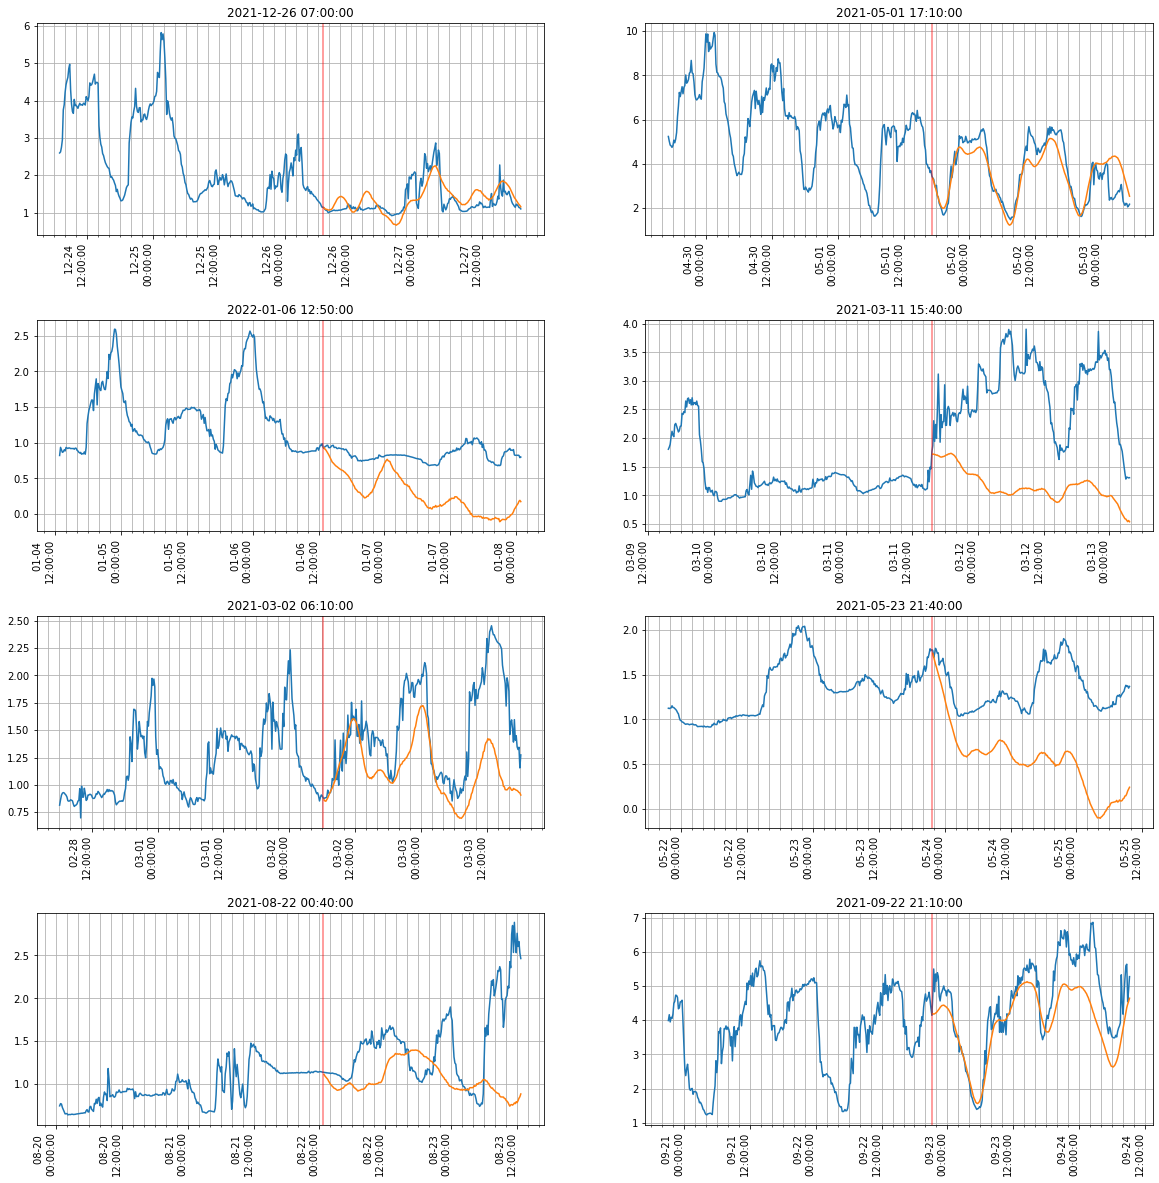

In [31]:
rows = 4
cols = 2
yscale = 1
xscale = 2

fig, ax = plt.subplots(nrows=rows, ncols=cols,figsize=(yscale*1920/my_dpi, xscale*1080/my_dpi))

for row in range(rows):
    for col in range(cols):
        startdate = MLdb.get_random_date('test')
        comp = MLdb.predict_window(past = 2,startdate = startdate)
        plot = comp.plot(ax = ax[row,col], legend = False,x_compat = True)

        plot.set(xlabel=None)
        # plot.xaxis.get_ticklocs(minor=True)
        plot.set_title(str(startdate))
        # plot.minorticks_on()
        plot.xaxis.set_minor_locator(ticker.AutoMinorLocator(6))
        plot.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m-%d \n%H:%M:%S'))


        plot.tick_params(axis='x',labelsize = 10,labelrotation= 90)
        plot.grid(which = 'both')
        plot.axvline(startdate,color = 'red',alpha = 0.5)

plt.subplots_adjust(hspace=0.4)
plt.show()



In [19]:
coeff = pd.DataFrame(model.coef_,columns=MLdb.train_x.columns)
ordered_idx = coeff.mean().abs().sort_values(ascending=False).index
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(coeff.mean()[ordered_idx])

TEMP_OPP_shifted_0_roll_6_func_mean              -1.599261e+12
TEMP_OPP_shifted_0_roll_6_func_sum               -1.576898e+12
EGV_OPP_shifted_0_roll_6_func_sum                 1.564714e+12
EGV_OPP_shifted_0_roll_6_func_mean                1.539848e+12
EGV_OPP_shifted_0_roll_12_func_mean               1.467167e+12
EGV_OPP_shifted_72_roll_72_func_sum               1.460926e+12
EGV_OPP_shifted_72_roll_72_func_mean              1.448331e+12
EGV_OPP_shifted_66_roll_144_func_sum             -1.408573e+12
EGV_OPP_shifted_66_roll_144_func_mean            -1.407975e+12
EGV_OPP_shifted_0_roll_12_func_sum                1.405180e+12
EGV_OPP_shifted_0_roll_144_func_mean             -1.385493e+12
EGV_OPP_shifted_0_roll_144_func_sum              -1.366758e+12
EGV_OPP_shifted_0_roll_72_func_mean               1.280941e+12
EGV_OPP_shifted_6_roll_6_func_mean                1.145775e+12
EGV_OPP_shifted_0_roll_72_func_sum                1.137042e+12
EGV_OPP_shifted_6_roll_6_func_sum                 1.131

In [20]:
# X = MLdb.train_x
# X2 = sma.add_constant(X)
# for i in range(MLdb.train_y.shape[1]):
#     y = MLdb.train_y.iloc[:,i]
#     est = sma.OLS(y,X2)
#     est2 = est.fit()
#
#

In [21]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(est2.pvalues<0.05)

const                                              True
TEMP_OPP                                          False
EGV_OPP                                            True
OW000-008/WNS3838 - gemeten waarde [°C].1         False
OW000-008/WNS7670 - gemeten waarde [mS/cm].1       True
hour                                               True
hour_sin                                           True
hour_cos                                           True
weekday                                            True
weekday_sin                                        True
weekday_cos                                        True
monthday                                           True
monthday_sin                                       True
monthday_cos                                       True
month                                              True
month_sin                                          True
month_cos                                          True
EGV_OPP_diff_order_1_lag_1                      